In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.api.types import is_numeric_dtype

Load the Dataset

In [ ]:
df = pd.read_csv('/content/PriceRangeofHDBFlatsOffered.csv')

### 1) Data Cleaning

In [ ]:
df

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0
...,...,...,...,...,...,...,...
328,2023,Tengah,5-room,454000,607000,409000,562000
329,2023,Woodlands,2-room,119000,231000,39000,151000
330,2023,Woodlands,3-room,223000,345000,148000,270000
331,2023,Woodlands,4-room,303000,468000,243000,408000


In [ ]:
df.isnull().sum()

,0
financial_year,0
town,0
room_type,0
min_selling_price,0
max_selling_price,0
min_selling_price_less_ahg_shg,0
max_selling_price_less_ahg_shg,0


In [ ]:
# Change prices data type to int
df['min_selling_price'] = pd.to_numeric(df['min_selling_price'], errors='coerce')
df['max_selling_price'] = pd.to_numeric(df['max_selling_price'], errors='coerce')
df['min_selling_price_less_ahg_shg'] = pd.to_numeric(df['min_selling_price_less_ahg_shg'], errors='coerce')
df['max_selling_price_less_ahg_shg'] = pd.to_numeric(df['max_selling_price_less_ahg_shg'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   financial_year                  333 non-null    int64  
 1   town                            333 non-null    object 
 2   room_type                       333 non-null    object 
 3   min_selling_price               328 non-null    float64
 4   max_selling_price               328 non-null    float64
 5   min_selling_price_less_ahg_shg  328 non-null    float64
 6   max_selling_price_less_ahg_shg  328 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 18.3+ KB


Check for and remove NaN values before changing data to int.

In [ ]:
pd.isna(df).sum()

,0
financial_year,0
town,0
room_type,0
min_selling_price,5
max_selling_price,5
min_selling_price_less_ahg_shg,5
max_selling_price_less_ahg_shg,5


In [ ]:
# Drop rows that have NaN values
df = df.dropna(subset=['min_selling_price', 'max_selling_price', 'min_selling_price_less_ahg_shg', 'max_selling_price_less_ahg_shg'])

# Replace all float to int
df['min_selling_price'] = df['min_selling_price'].astype(int)
df['max_selling_price'] = df['max_selling_price'].astype(int)
df['min_selling_price_less_ahg_shg'] = df['min_selling_price_less_ahg_shg'].astype(int)
df['max_selling_price_less_ahg_shg'] = df['max_selling_price_less_ahg_shg'].astype(int)

<ipython-input-8-faa1b5270160>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['min_selling_price'] = df['min_selling_price'].astype(int)
<ipython-input-8-faa1b5270160>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['max_selling_price'] = df['max_selling_price'].astype(int)
<ipython-input-8-faa1b5270160>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 0 to 332
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   financial_year                  328 non-null    int64 
 1   town                            328 non-null    object
 2   room_type                       328 non-null    object
 3   min_selling_price               328 non-null    int64 
 4   max_selling_price               328 non-null    int64 
 5   min_selling_price_less_ahg_shg  328 non-null    int64 
 6   max_selling_price_less_ahg_shg  328 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 20.5+ KB


Create a function to remove outliers in the data

In [ ]:
# Function to remove outliers
def remove_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  iqr = q3 - q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3  + 1.5 * iqr

  filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

  return filtered_df

In [ ]:
for col in df.columns:
  if is_numeric_dtype(df[col]):
    cleaned_df = remove_outliers(df, col)

##### Drop columns that are not needed

In [ ]:
print(cleaned_df['room_type'].unique())

['2-room' '3-room' '4-room' '5-room' '2-room ']


In [ ]:
room_mapping = {
    '2-room': 2,
    '3-room': 3,
    '4-room': 4,
    '5-room': 5,
    '2-room ': 2
}

cleaned_df['room_type'] = cleaned_df['room_type'].map(room_mapping)
print(cleaned_df['room_type'].unique())
cleaned_df

[2 3 4 5]


,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2,82000,107000,0,0
1,2008,Punggol,3,135000,211000,0,0
2,2008,Punggol,4,223000,327000,0,0
3,2008,Punggol,5,305000,428000,0,0
4,2008,Jurong West,3,142000,160000,0,0
...,...,...,...,...,...,...,...
328,2023,Tengah,5,454000,607000,409000,562000
329,2023,Woodlands,2,119000,231000,39000,151000
330,2023,Woodlands,3,223000,345000,148000,270000
331,2023,Woodlands,4,303000,468000,243000,408000


In [ ]:
cleaned_df['room_type'] = pd.to_numeric(cleaned_df['room_type'], errors='coerce')

In [ ]:
print(cleaned_df['room_type'].isna().sum())

0


In [ ]:
 print(cleaned_df['room_type'].dtypes)

int64


In [ ]:
cleaned_df = cleaned_df.drop(columns=['min_selling_price', 'min_selling_price_less_ahg_shg', 'max_selling_price_less_ahg_shg'])
print(cleaned_df.columns)
cleaned_df.head()

Index(['financial_year', 'town', 'room_type', 'max_selling_price'], dtype='object')


,financial_year,town,room_type,max_selling_price
0,2008,Punggol,2,107000
1,2008,Punggol,3,211000
2,2008,Punggol,4,327000
3,2008,Punggol,5,428000
4,2008,Jurong West,3,160000


##### Use One-hot encoding on room-type and town

In [ ]:
encoded_df = pd.get_dummies(cleaned_df, columns=['town'], drop_first=True)
encoded_df

,financial_year,room_type,max_selling_price,town_Bukit Panjang,town_Choa Chu Kang,town_Hougang,town_Hougang,town_Jurong East,town_Jurong West,town_Punggol,town_Sembawang,town_Sengkang,town_Tengah,town_Woodlands,town_Yishun
0,2008,2,107000,False,False,False,False,False,False,True,False,False,False,False,False
1,2008,3,211000,False,False,False,False,False,False,True,False,False,False,False,False
2,2008,4,327000,False,False,False,False,False,False,True,False,False,False,False,False
3,2008,5,428000,False,False,False,False,False,False,True,False,False,False,False,False
4,2008,3,160000,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2023,5,607000,False,False,False,False,False,False,False,False,False,True,False,False
329,2023,2,231000,False,False,False,False,False,False,False,False,False,False,True,False
330,2023,3,345000,False,False,False,False,False,False,False,False,False,False,True,False
331,2023,4,468000,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
print(encoded_df.columns.tolist())  # Prints all column names as a list
encoded_df.columns = encoded_df.columns.str.strip()  # Remove leading/trailing spaces
print(encoded_df.columns.duplicated())  # Boolean mask
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]
print(encoded_df.columns.tolist())  # Prints all column names as a list

['financial_year', 'room_type', 'max_selling_price', 'town_Bukit Panjang', 'town_Choa Chu Kang', 'town_Hougang', 'town_Jurong East', 'town_Jurong West', 'town_Punggol', 'town_Sembawang', 'town_Sengkang', 'town_Tengah', 'town_Woodlands', 'town_Yishun']
[False False False False False False False False False False False False
 False False]
['financial_year', 'room_type', 'max_selling_price', 'town_Bukit Panjang', 'town_Choa Chu Kang', 'town_Hougang', 'town_Jurong East', 'town_Jurong West', 'town_Punggol', 'town_Sembawang', 'town_Sengkang', 'town_Tengah', 'town_Woodlands', 'town_Yishun']


### 2) Data Preprocessing


In [ ]:
# Split the data into features (X) and target variable (y)
X = encoded_df.drop(columns=['max_selling_price'])
y = encoded_df['max_selling_price']


# Split the data into training and testing sets (80% training and 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3) Build the model

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

### 4) Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: %0.2f" % (rmse))

# R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Root Mean Squared Error: 68975.45
R² Score: 0.7455658160455606


### Visualisation

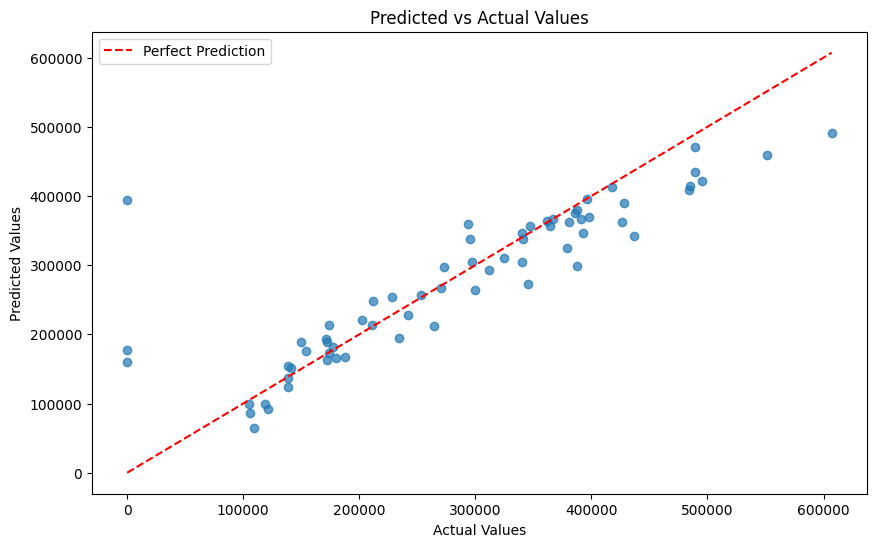

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:

# Create a new input with the same structure as your model training data
input_data = pd.DataFrame({
    'financial_year': [2025],
    'room_type': [4],
    'town_Bukit Panjang': [0],
    'town_Choa Chu Kang': [0],
    'town_Hougang': [0],
    'town_Jurong East': [0],
    'town_Jurong West': [0],
    'town_Punggol': [1],
    'town_Sembawang': [0],
    'town_Sengkang': [0],
    'town_Tengah': [0],
    'town_Woodlands': [0],
    'town_Yishun': [0],
})


predicted_price = model.predict(input_data)
print(f"Predicted Price for a 4-room flat in Punggol in 2025: ${predicted_price[0]:,.2f}")

Predicted Price for a 4-room flat in Punggol in 2025: $481,518.25
